In [1]:
from bunkatopics import BunkaTopics
import pandas as pd

In [5]:
df = pd.read_csv("../data/imdb.csv", index_col=[0])
df = df.sample(500, random_state=42)
df = df[["imdb", "description"]].dropna()

In [ ]:
model = BunkaTopics(df, 
                    text_var = 'description',
                    index_var = 'imdb',
                    extract_terms=True,
                    terms_embeddings=True,
                    docs_embeddings=True,
                    embeddings_model="distiluse-base-multilingual-cased-v1",
                    multiprocessing=True,
                    language="en",
                    sample_size_terms = len(df),
                    terms_limit=3000,
                    terms_ents=True,
                    terms_ngrams=(1, 2),
                    terms_ncs=True,
                    terms_include_pos=["NOUN", "PROPN", "ADJ"],
                    terms_include_types=["PERSON", "ORG"])

2022-05-24 09:10:38,113 - Extracting Terms...
100%|█████████████████████████████████████████████████████████████████████| 498/498 [00:03<00:00, 153.66it/s]
2022-05-24 09:10:41,723 - Extracting Docs Embeddings...
  0%|                                                                                | 0/498 [00:00<?, ?it/s]

In [27]:
topics = model.get_clusters(topic_number= 20,
                    top_terms = 3,
                    term_type = "lemma",
                    top_terms_included = 1000,
                    ngrams = [1, 2])

UMAP(random_state=42, verbose=True)
Tue May 24 08:04:46 2022 Construct fuzzy simplicial set
Tue May 24 08:04:49 2022 Finding Nearest Neighbors
Tue May 24 08:04:49 2022 Finished Nearest Neighbor Search
Tue May 24 08:04:49 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue May 24 08:04:54 2022 Finished embedding


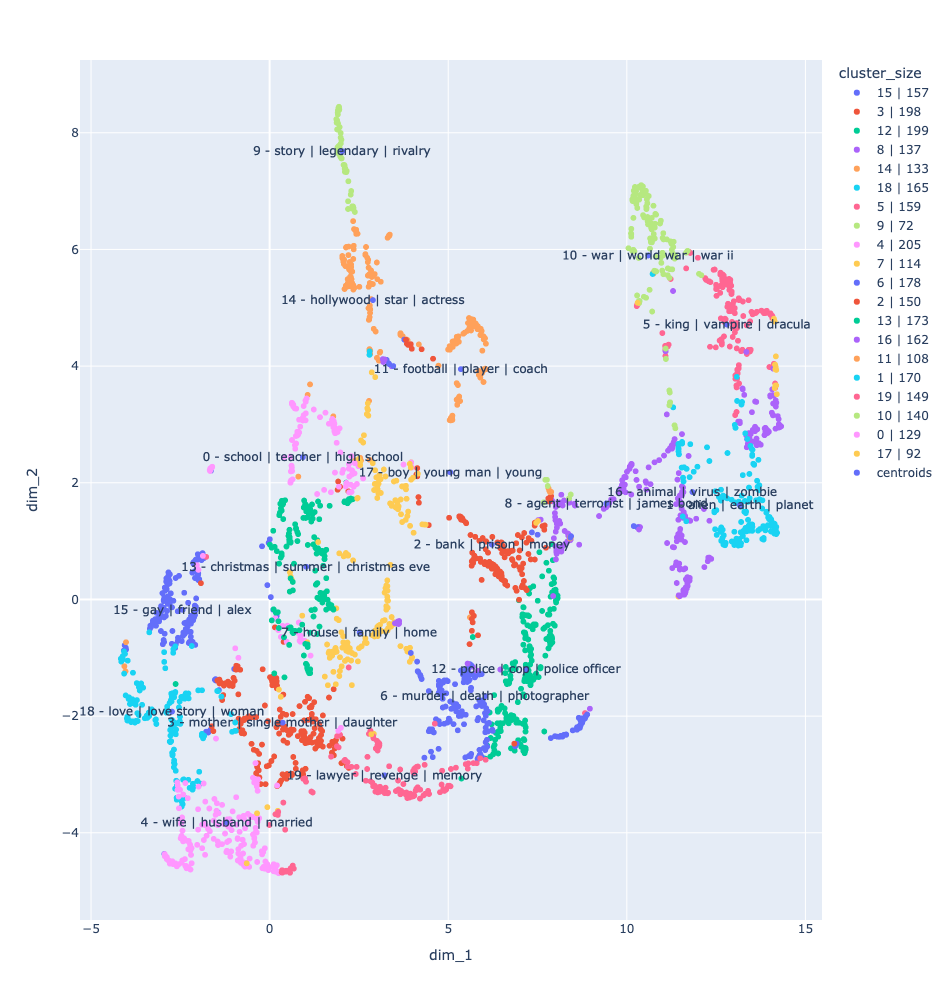

In [31]:
fig = model.visualize_clusters(search = None, width=1000, height=1000)
fig.show()